32
0 -0.41430898202739247
1 -0.14304877366139349
2 0.21200746623461064
3 0.44287260773473586
4 0.41430898202739247
5 0.14304877366139346
6 -0.2120074662346107
7 -0.4428726077347358
3
-0.8571815897621284
0.014450215817912202
15.999999999999993
nan
0.456616870423827
5.4494652514664965


C:\Users\Tony_\AppData\Local\Temp\ipykernel_5472\3383894699.py:41: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(cos_val))


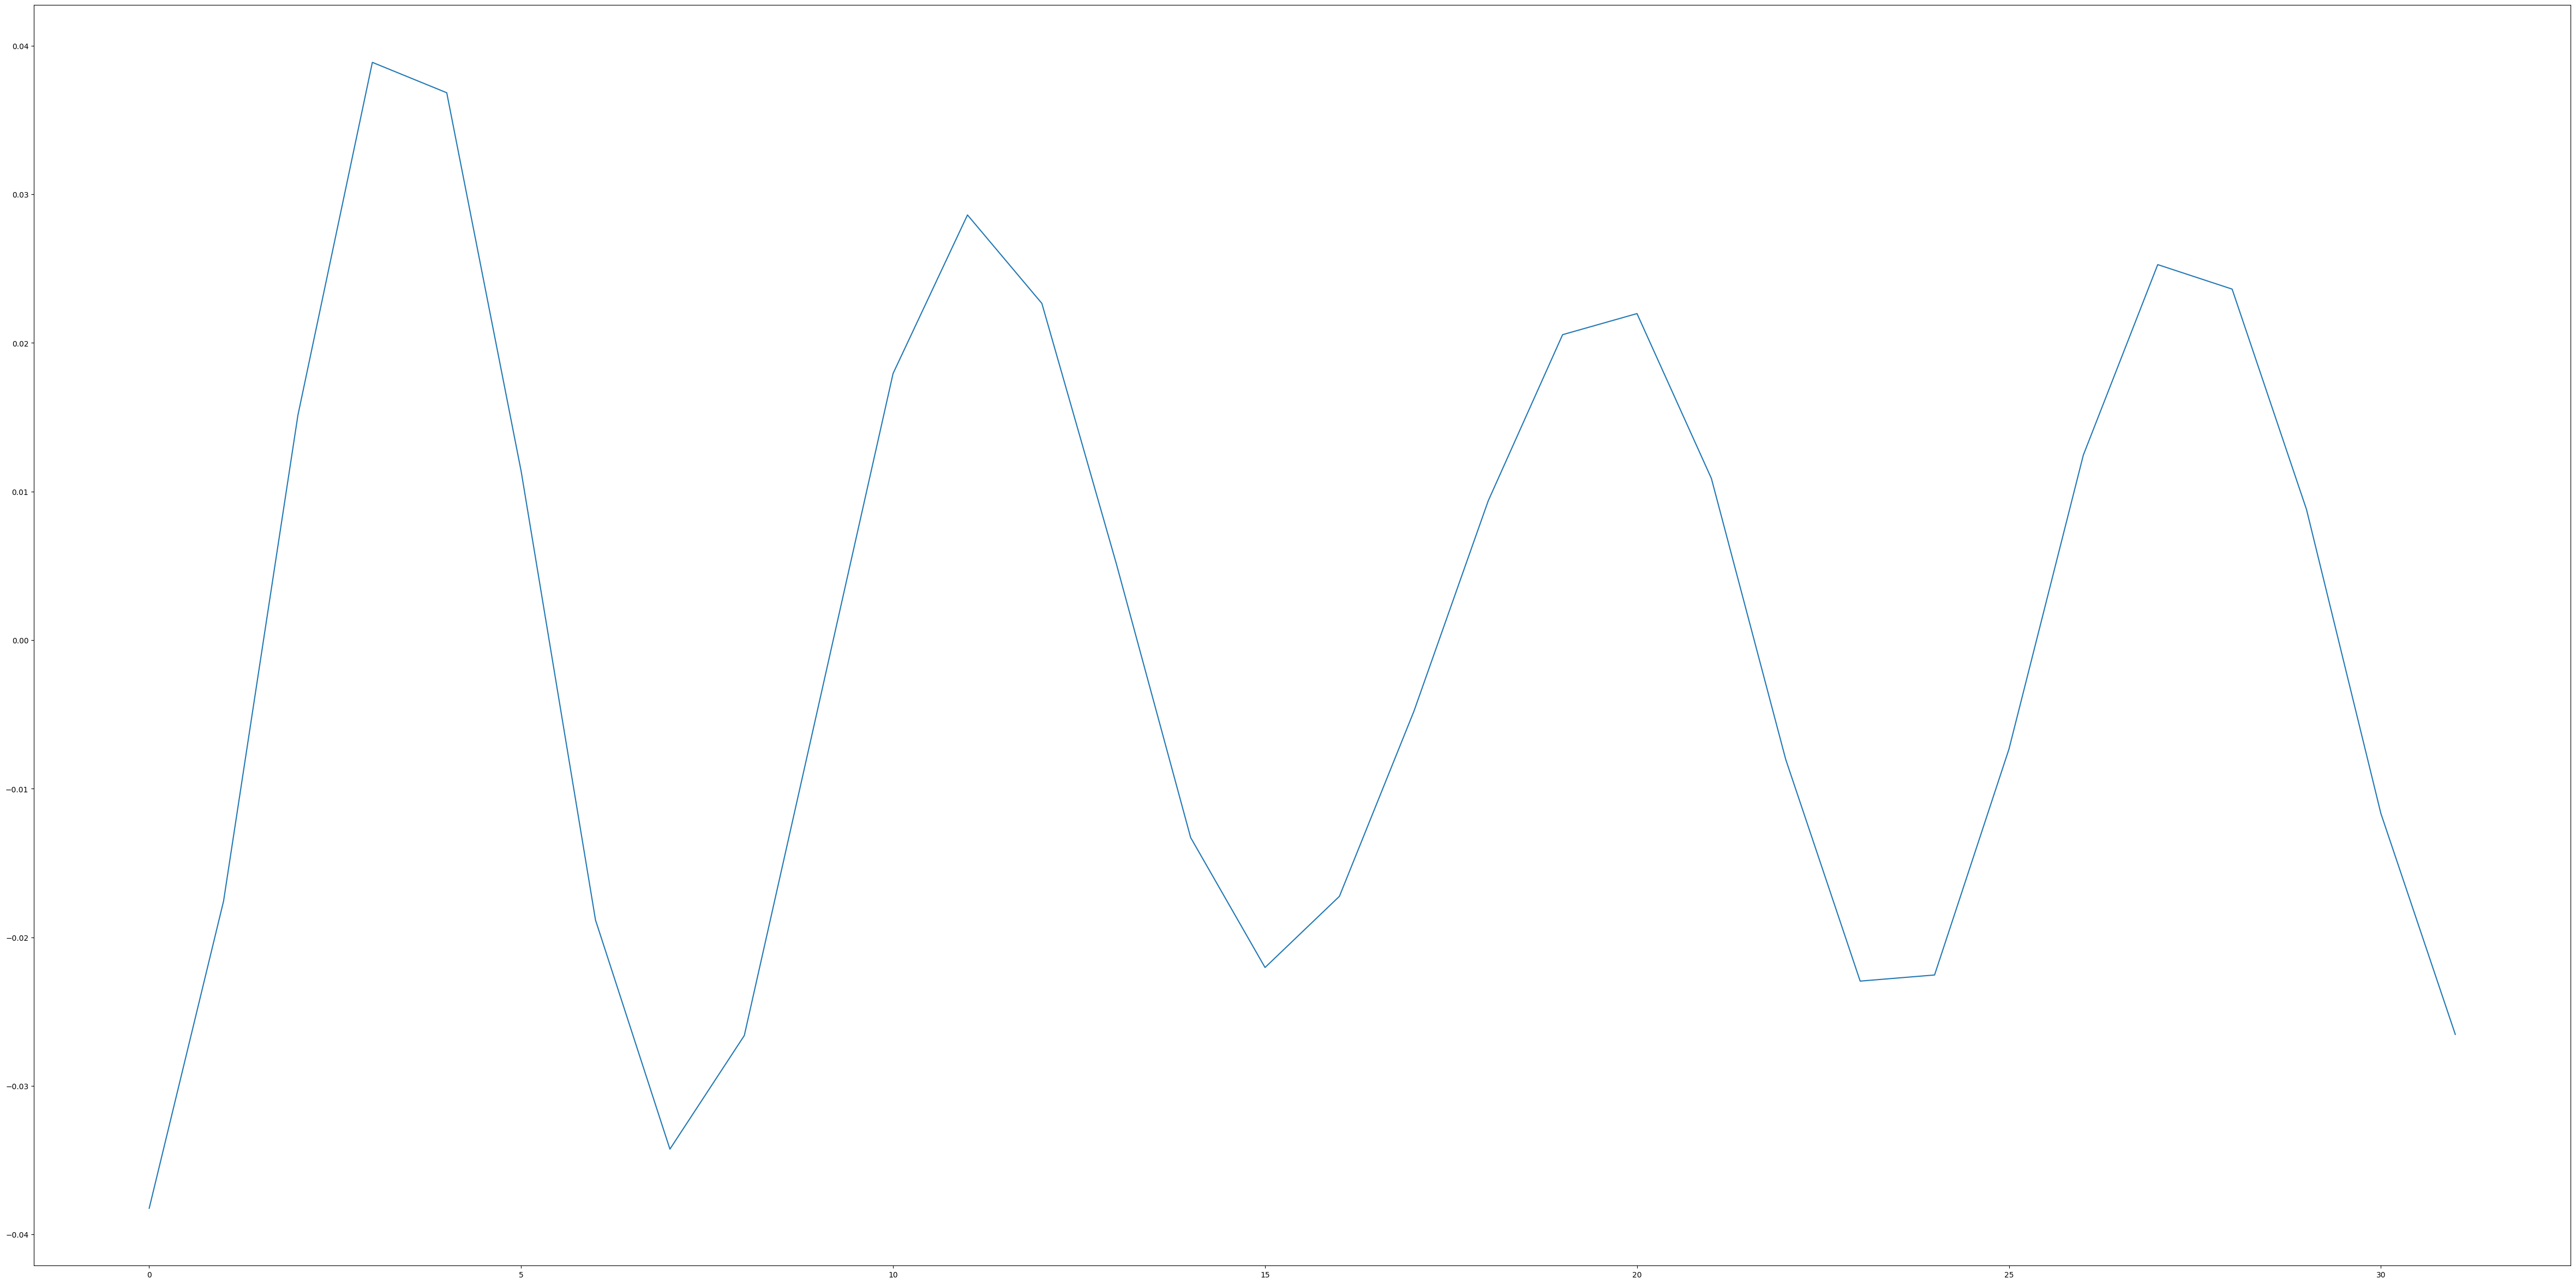

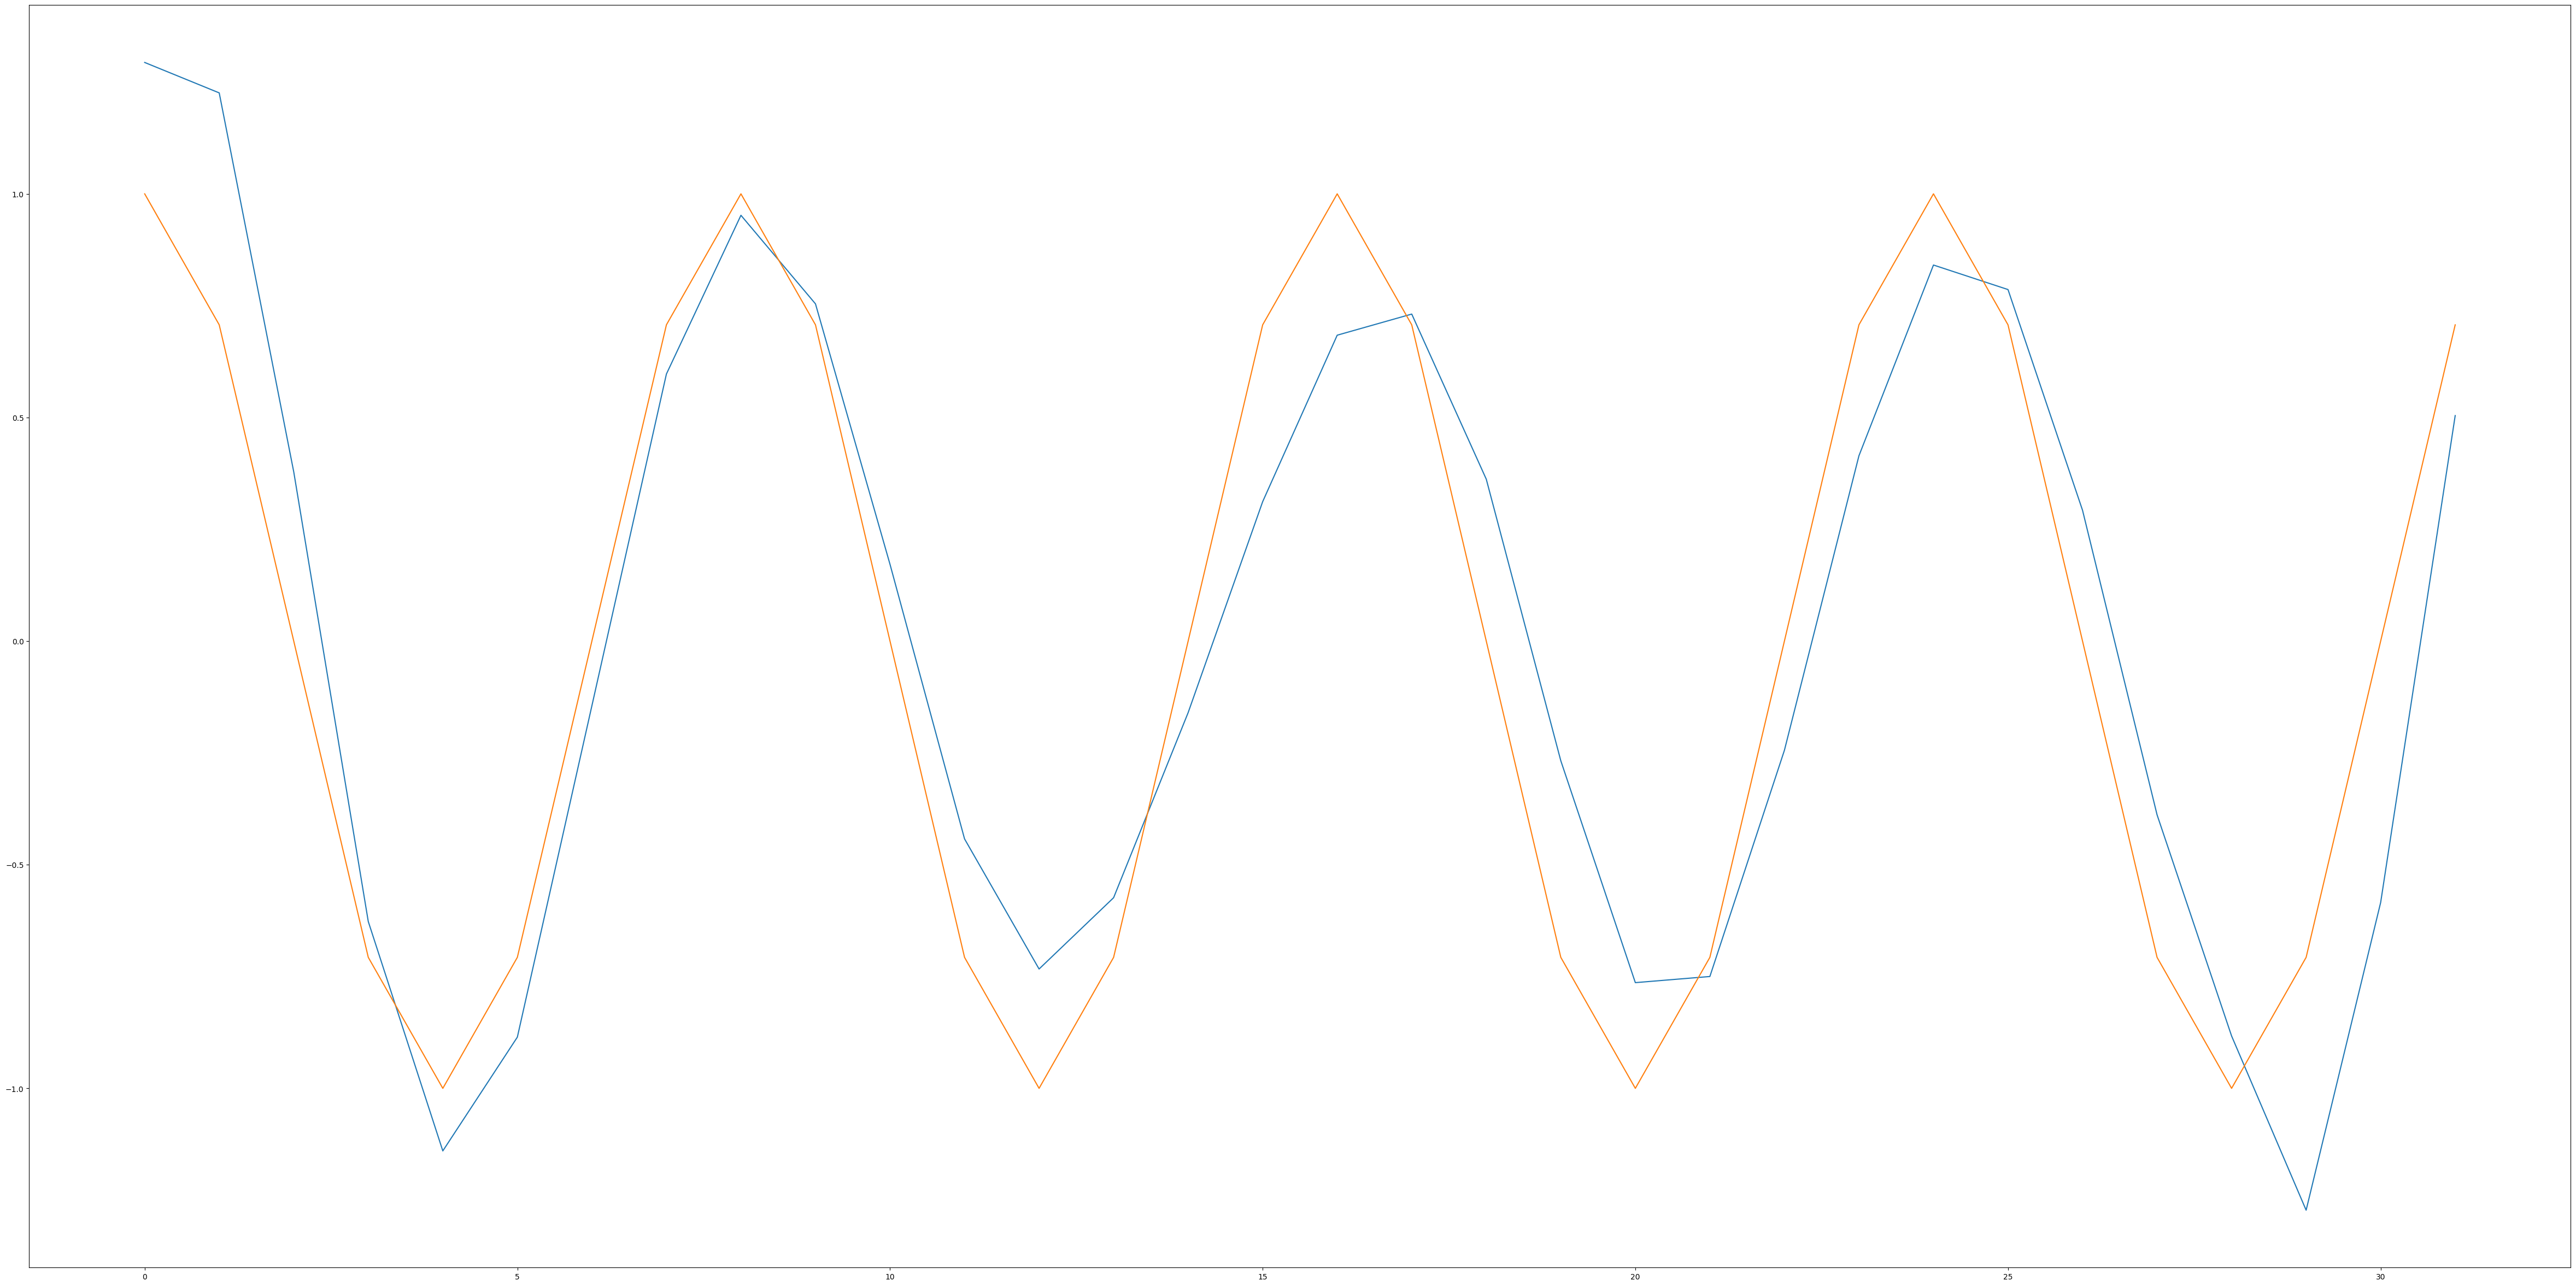

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a=[-0.0382385, -0.0175629, 0.015152, 0.0388794, 0.0368347, 0.0113678, -0.0188446, -0.034256, -0.0266113, -0.00434875, 0.0179443, 0.0286102, 0.0226593, 0.00515747, -0.0132904, -0.0220337, -0.0172424, -0.00480652, 0.0093689, 0.0205536, 0.0219727, 0.0108795, -0.00804138, -0.0229492, -0.0225372, -0.00733948, 0.0124512, 0.0252686, 0.0236206, 0.00878906, -0.011673, -0.026535,]
a = a[:32]
plt.figure(figsize=(60,30))
plt.plot(a)


t = np.arange(0,32)/48000
print(len(t))
ref= np.cos(2*np.pi*6000*t)
axis = np.sin(2*np.pi*6000*t)

sum=0
auto_a=np.dot(a,a)

max_val = 0
max_offset = 0
for i in range(len(a)//4):
    sum=0
    for j in range(len(a)):
        sum += ref[j]*a[(i+j)%32]
    print(i,sum)
    if sum > max_val:
        max_val = sum
        max_offset = i

print(max_offset)

auto_ref=0
for i in range(len(t)):
    sum+=a[i]*ref[i]
    auto_ref += ref[i]**2

print(sum)
print(auto_a)
print(auto_ref)

cos_val = sum/np.sqrt(auto_a*auto_ref)
print(np.arccos(cos_val))

for i in range(len(t)):
    a[i] *= np.sqrt(auto_ref/auto_a)

aaa = np.concatenate([a,a,a])
plt.figure(figsize=(60,30))
offset=7
plt.plot(aaa[max_offset:max_offset+32])
plt.plot(ref)


sum=0
auto_a=0
auto_ref=0
for i in range(len(t)):
    sum+=axis[i]*(a[i]-ref[i])
    auto_a+=a[i]**2
    auto_ref += ref[i]**2

sin_val = sum/np.sqrt(auto_a*auto_ref)
print(np.arcsin(sin_val))

print((1.07)/np.pi*16)
